## **MNIST Digits - Classification Using SVM**

**Problem Statement**



Design a project from the MNIST dataset to identify digit classification using the SVM algorithm.












>Project Prequisites
1.   Python()
2.   IDE(Google Colaboratory)

> Required Frameworks are
1.   pandas
2.   numpy
3.   matplotlib
4.   seaborn
5.   sklearn











**Objective**


To build a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on pixel values given as features.So,It is 10 class classification problem.





**Description of data**

We were provided with MNIST dataset which is a large dataset of handwritten digits.Lables of given dataset are 0-9


Since each image is of 28x28 pixel,each pixel forms a feature and in total 784 features are provided .






Steps followed for building model




*   Data understanding and cleaning
*   Data preparation
*   Model building





**Data Understanding and cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
data=pd.read_csv("/content/sample_data/digit_svm1.csv").astype('float64')
data.shape

(42000, 785)

In [ ]:
# to know the info of datatypes of features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: float64(785)
memory usage: 251.5 MB


In [ ]:
#By default displays the first five rows of dataset
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#to know how many labels of each digit are present in the data
data.label.value_counts()

1.0    4684
7.0    4401
3.0    4351
9.0    4188
2.0    4177
6.0    4137
0.0    4132
4.0    4072
8.0    4063
5.0    3795
Name: label, dtype: int64

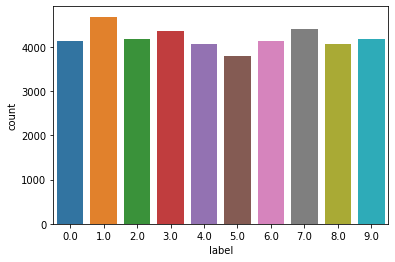

In [ ]:
#checking whether data given is balanced or not
sns.countplot(x="label",data=data)
plt.show()

Checking if there are any null values in data

In [ ]:
#count of missing values of each coloumn
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
#count missing values in dataset 
data.isnull().values.sum()

0

We can proceed with next steps since there is no null values in dataset

Lets look at the average values of each column ,since we need to preprocess the data if range varies .

In [ ]:
#average values of features
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

It's better to rescale the data since the avearge range of each pixel vary 

**Data Preparation**

Divide the data into input and output

In [ ]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array([1., 0., 1., ..., 7., 6., 9.])

Splitting the data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


Scaling our data using **StandardScaler** since the range of means of features vary

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
#scaling the features
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Building the model** using **SVC**

In [ ]:
from sklearn.svm import SVC


Let's build using **linear SVM model**

In [ ]:
#Linear SVM model by keeping hyperparameters set to default
svm_linear=SVC(kernel='linear',random_state=0)

In [ ]:
#fitting the model
svm_linear.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#doing predictions on test data
pred_y=svm_linear.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,pred_y)

array([[778,   0,   7,   4,   3,   6,  11,   0,   3,   1],
       [  0, 947,   4,   1,   0,   1,   1,   2,   5,   0],
       [ 10,   9, 780,  16,  11,   7,   6,   8,  12,   1],
       [  2,   3,  25, 779,   1,  24,   0,   5,  19,   5],
       [  3,   5,   8,   1, 778,   3,   5,   3,   3,  18],
       [  7,   7,   7,  38,   5, 662,   8,   2,  16,   4],
       [  6,   0,  15,   0,  13,  11, 795,   0,   1,   0],
       [  4,   5,  11,   7,  12,   0,   1, 831,   6,  22],
       [  5,  14,  11,  29,   5,  24,   6,   1, 666,   7],
       [ 11,   4,   6,   8,  33,   8,   0,  28,   7, 707]])

Measuring accuracy

In [ ]:
#calculating accuracy score
accuracy_score(y_test,pred_y)

0.919404761904762

In [ ]:
#class wise acccuracy
class_wise=classification_report(y_true=y_test,y_pred=pred_y)
print(class_wise)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       813
         1.0       0.95      0.99      0.97       961
         2.0       0.89      0.91      0.90       860
         3.0       0.88      0.90      0.89       863
         4.0       0.90      0.94      0.92       827
         5.0       0.89      0.88      0.88       756
         6.0       0.95      0.95      0.95       841
         7.0       0.94      0.92      0.93       899
         8.0       0.90      0.87      0.88       768
         9.0       0.92      0.87      0.90       812

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



Let's build using **NonLinear SVM model**

In [ ]:
#using rbf kernel by setting hyperparameters to 
svm_rbf=SVC(kernel='rbf',random_state=0)


In [ ]:
#fitting the model
svm_rbf.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#doing prediction on test data
y_pred=svm_rbf.predict(x_test)

In [ ]:
#accuracy for rbf model
accuracy_score(y_test,y_pred)

0.9577380952380953

In [ ]:
#class wise accuracy for rbf model
class_wise=classification_report(y_true=y_test,y_pred=y_pred)
print(class_wise)


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       813
         1.0       0.98      0.98      0.98       961
         2.0       0.90      0.97      0.93       860
         3.0       0.96      0.94      0.95       863
         4.0       0.97      0.95      0.96       827
         5.0       0.95      0.96      0.96       756
         6.0       0.96      0.97      0.97       841
         7.0       0.96      0.95      0.95       899
         8.0       0.96      0.94      0.95       768
         9.0       0.96      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
confusion_matrix(y_test,y_pred)

array([[792,   0,   5,   0,   2,   2,   7,   1,   4,   0],
       [  0, 941,  10,   2,   1,   0,   2,   2,   2,   1],
       [  4,   2, 834,   6,   3,   0,   2,   6,   3,   0],
       [  0,   3,  14, 810,   2,  11,   2,   8,  11,   2],
       [  1,   4,  11,   0, 788,   2,   4,   1,   2,  14],
       [  3,   1,   3,   8,   1, 728,   7,   0,   3,   2],
       [  2,   0,  14,   0,   1,   6, 816,   0,   2,   0],
       [  0,   4,  22,   1,   7,   0,   0, 853,   3,   9],
       [  2,   5,   6,   7,   3,  12,   7,   1, 723,   2],
       [  3,   2,   8,   7,   8,   2,   0,  18,   4, 760]])

**Conclusion:**The final accuracy on test data is **95.7%** using **rbf kernel** of **SVM**